In [43]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

In [44]:
messy_df = pd.read_pickle('../data/messy_df.pkl')

In [45]:
messy_df.head()

,created_utc,subreddit,subreddit_subscribers,title,text,upvote_ratio,num_comments,url,image?,image_text
0,1.502177e+09,TheRedPill,0.0,Google Fires Ph.D Biologist/Engineer For Claim...,"As reported in Bloomberg, Google has fired a s...",0.65,840.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,
1,1.480424e+09,TheRedPill,0.0,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,**A complete guide to picking up 9s and 10s** ...,0.82,760.0,https://www.reddit.com/r/TheRedPill/comments/5...,False,
2,1.502101e+09,TheRedPill,0.0,I have been practicing Stoicism for 3 years no...,**Practical Stoicism Tools**\n\nStoicism philo...,0.86,179.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,
3,1.433962e+09,TheRedPill,0.0,"[META] Reddit rolls out first ban wave of ""Har...",The most notorious target was FatPeopleHate. Y...,0.87,954.0,https://www.reddit.com/r/TheRedPill/comments/3...,False,
4,1.500270e+09,TheRedPill,0.0,"Man gets his ex-GF to pay child support, and R...",Kind of surprised this hasn't made its way her...,0.90,336.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,


In [46]:
messy_df['total_text'] = messy_df['title'] + ' ' + messy_df['image_text'] + ' ' + messy_df['text']

In [47]:
messy_df = messy_df.drop(columns= ['title', 'text'])

In [48]:
messy_df['total_text'].dropna()

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
35126                                           Equality  
35127                they can't handle the neutron style  
35128    H Bethesda @\n@bethesda\n\nBethesda UK @\n(@) ...
35129    Feminists when they hear people are being draf...
35130    Triggered Everyone Is so =\n\npolitically corr...
Name: total_text, Length: 35131, dtype: object

In [49]:
messy_df['total_text']

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
35126                                           Equality  
35127                they can't handle the neutron style  
35128    H Bethesda @\n@bethesda\n\nBethesda UK @\n(@) ...
35129    Feminists when they hear people are being draf...
35130    Triggered Everyone Is so =\n\npolitically corr...
Name: total_text, Length: 35131, dtype: object

In [50]:
stopwords_ = stopwords.words('English')
stopwords_ += list(string.punctuation)
stopwords_ += ['’', "'s", "n't", "''", '``', '--', '”', '“', "'m", '...', "'ll", "'d", '‘', "'re", "'ve", "\\-", '—', '–', 'x200b', '..', '....']

stopwords_ += ['r', 'www', 'https', 'http', 'com', 'post', 'sub', 'account', 'imgur', 'amp'] #commonly used reddit link words
stopwords_ += ['like', 'would', 'much', 'also', 'really', 'even', 'gt', 'us', 'never', 'see', 'way', 'could', 'back', 'need', 'take', 'get',
                 'one', 'time', 'want', 'make', 'know', 'thing', 'got', 'many', 'every', 'let', 'lot', 'ever', 'around', 'put', 'enough', 
                 'sure', 'may', 'must', 'went', 'often', 'might', 'get', 'probably', 'literally', 'though', 'else', 'least', 'yet', 'set', 
                 'oh', 'na', 'finally', 'nbsp', 'almost', 'simply', 'wo', 'whatever', 'sometimes', 'completely', 'permanently', 'actual', 'possible',
                 'absolutely', 'within', 'including', 'thing', 'something'] #common words in the dataset

In [51]:
lemmatizer = WordNetLemmatizer()

In [52]:
def stop_and_lemmatize(string):
    """
    Helper function for eda on the total corpus
    """
    #current = re.split(r'[^a-zA-Z]', string)
    current = word_tokenize(string)

    total = [x.lower() for x in current if x.lower() not in stopwords_]

    final = [lemmatizer.lemmatize(x) for x in total]

    return final

In [53]:
messy_df['tokenned_stopped_text'] = messy_df['total_text'].apply(stop_and_lemmatize)

In [54]:
messy_df

,created_utc,subreddit,subreddit_subscribers,upvote_ratio,num_comments,url,image?,image_text,total_text,tokenned_stopped_text
0,1.502177e+09,TheRedPill,0.0,0.65,840.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim..."
1,1.480424e+09,TheRedPill,0.0,0.82,760.0,https://www.reddit.com/r/TheRedPill/comments/5...,False,,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[laid, warlord, 37, rule, approaching, model-t..."
2,1.502101e+09,TheRedPill,0.0,0.86,179.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, 3, year, quality, life,..."
3,1.433962e+09,TheRedPill,0.0,0.87,954.0,https://www.reddit.com/r/TheRedPill/comments/3...,False,,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi..."
4,1.500270e+09,TheRedPill,0.0,0.90,336.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,..."
...,...,...,...,...,...,...,...,...,...,...
35126,1.643810e+09,Offensivejokes,204260.0,0.98,62.0,https://i.redd.it/e6h15fqidff81.jpg,True,,Equality,[equality]
35127,1.653582e+09,Offensivejokes,204260.0,0.98,96.0,https://i.redd.it/0qeo14cnhu191.gif,False,,they can't handle the neutron style,"[ca, handle, neutron, style]"
35128,1.633359e+09,Offensivejokes,204260.0,0.99,57.0,https://i.redd.it/vdssmlvq5gr71.jpg,True,Bethesda @\n@bethesda\n\nBethesda UK @\n(@) ii...,H Bethesda @\n@bethesda\n\nBethesda UK @\n(@) ...,"[h, bethesda, bethesda, bethesda, uk, iio, tat..."
35129,1.645707e+09,Offensivejokes,204260.0,0.99,40.0,https://i.redd.it/3k5t1qkc1sj81.jpg,True,Feminists when they hear people\nare being dra...,Feminists when they hear people are being draf...,"[feminist, hear, people, drafted, world, war, ..."


In [55]:
corpus_series = messy_df['tokenned_stopped_text']

In [56]:
corpus_series

0        [google, fire, ph.d, biologist/engineer, claim...
1        [laid, warlord, 37, rule, approaching, model-t...
2        [practicing, stoicism, 3, year, quality, life,...
3        [meta, reddit, roll, first, ban, wave, harassi...
4        [man, get, ex-gf, pay, child, support, reddit,...
                               ...                        
35126                                           [equality]
35127                         [ca, handle, neutron, style]
35128    [h, bethesda, bethesda, bethesda, uk, iio, tat...
35129    [feminist, hear, people, drafted, world, war, ...
35130    [triggered, everyone, politically, correct, da...
Name: tokenned_stopped_text, Length: 35131, dtype: object

In [57]:
new_corpus_series = []

for word_list in corpus_series:
    new_corpus_series.extend(word_list)

In [58]:
new_corpus_series = pd.Series(new_corpus_series)

In [59]:
len(new_corpus_series)

1304410

In [60]:
freqdist = FreqDist(new_corpus_series)
most_common = freqdist.most_common(500)
most_common

[('people', 8274),
 ('woman', 7961),
 ('year', 4671),
 ('men', 4443),
 ('day', 3916),
 ('say', 3882),
 ('go', 3832),
 ('think', 3636),
 ('right', 3334),
 ('guy', 3311),
 ('life', 3284),
 ('girl', 3257),
 ('2', 3191),
 ('twitter', 3014),
 ('man', 3006),
 ('trump', 2760),
 ('going', 2757),
 ('1', 2715),
 ('work', 2651),
 ('good', 2625),
 ('4', 2620),
 ('new', 2600),
 ('first', 2499),
 ('said', 2480),
 ('feel', 2478),
 ('©', 2420),
 ('comment', 2405),
 ('e', 2372),
 ('still', 2324),
 ('3', 2249),
 ('look', 2169),
 ('made', 2076),
 ('child', 2019),
 ('friend', 1989),
 ('come', 1884),
 ('give', 1858),
 ('share', 1853),
 ('love', 1848),
 ('kid', 1827),
 ('thing', 1822),
 ('fuck', 1818),
 ('pm', 1815),
 ('world', 1801),
 ('someone', 1794),
 ('well', 1777),
 ('sex', 1753),
 ('edit', 1720),
 ('tell', 1682),
 ('state', 1670),
 ('getting', 1660),
 ('everyone', 1644),
 ('today', 1636),
 ('told', 1596),
 ('old', 1592),
 ('ago', 1592),
 ('use', 1579),
 ('5', 1574),
 ('ca', 1566),
 ('thought', 1561),

In [61]:
top_30 = most_common[0:30]

In [62]:
x = []
y = []

for tuple in top_30:
    x.append(tuple[0])
    y.append(tuple[1])

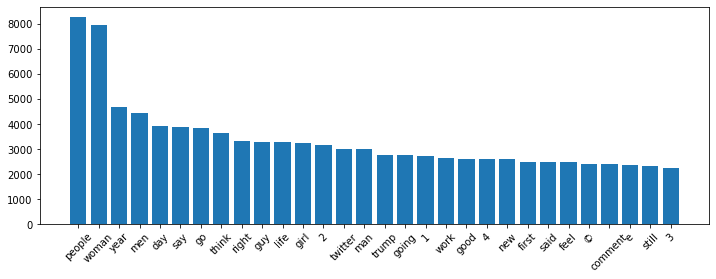

In [63]:
fig, ax = plt.subplots()

fig.set_figwidth(12)

ax.bar(x,y)
plt.xticks(rotation = 45)
plt.show()

In [64]:
messy_df['finalized_text'] = messy_df['tokenned_stopped_text'].apply(lambda x: " ".join(x))

## Combine text by subreddit for clustering

In [66]:
agg_df = messy_df.drop(columns = ['created_utc', 'num_comments', 'subreddit_subscribers', 'upvote_ratio', 'image?', 'url'])

In [67]:
agg_df.head()

,subreddit,image_text,total_text,tokenned_stopped_text,finalized_text
0,TheRedPill,,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim...",google fire ph.d biologist/engineer claiming a...
1,TheRedPill,,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[laid, warlord, 37, rule, approaching, model-t...",laid warlord 37 rule approaching model-tier gi...
2,TheRedPill,,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, 3, year, quality, life,...",practicing stoicism 3 year quality life increa...
3,TheRedPill,,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi...",meta reddit roll first ban wave harassing subr...
4,TheRedPill,,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,...",man get ex-gf pay child support reddit freak k...


In [68]:
total_text_dict = {}

for index, row in agg_df.iterrows():
    if row['subreddit'] in total_text_dict.keys():
        total_text_dict[row['subreddit']] = total_text_dict[row['subreddit']] + ' ' + row['finalized_text']
    else:
        print(row['subreddit'])
        total_text_dict[row['subreddit']] = row['finalized_text']

TheRedPill
BlackPeopleTwitter
WhitePeopleTwitter
politics
law
news
worldnews
Jokes
funny
gaming
Games
technology
tech
technews
gadgets
space
science
nextfuckinglevel
MurderedByWords
mildlyinteresting
Damnthatsinteresting
mildlyinfuriating
wallstreetbets
Superstonk
shitposting
pcmasterrace
teenagers
PublicFreakout
memes
AskReddit
AskAnAmerican
Gamingcirclejerk
nottheonion
gatesopencomeonin
wholesomememes
wholesome
interestingasfuck
PoliticalCompassMemes
PoliticalHumor
AskMen
AskWomen
TooAfraidToAsk
MadeMeSmile
rareinsults
UFOs
HighStrangeness
todayilearned
RoastMe
CryptoCurrency
Wellthatsucks
barstoolsports
awfuleverything
unpopularopinion
atheism
Christianity
Catholicism
changemyview
Coronavirus
COVID19
coronavirusNYC
Masks4All
environment
TrollXChromosomes
TrollYChromosome
WikiLeaks
4chan
greentext
NoStupidQuestions
offmychest
texas
terriblefacebookmemes
insanepeoplefacebook
ShitMomGroupsSay
masskillers
Parenting
Marriage
neoliberal
spacex
savedyouaclick
socialmedia
moderatepolitics
v

In [69]:
final_df = pd.DataFrame.from_dict(total_text_dict, orient = 'index')

In [70]:
final_df = final_df.rename(columns = {0 : 'text'})

In [71]:
final_df.index

Index(['TheRedPill', 'BlackPeopleTwitter', 'WhitePeopleTwitter', 'politics',
       'law', 'news', 'worldnews', 'Jokes', 'funny', 'gaming',
       ...
       'ar15', 'guns', 'nra', 'Firearms', 'CCW', 'Glocks', 'tacticalgear',
       'liberalgunowners', 'HillaryForPrison', 'Offensivejokes'],
      dtype='object', length=180)

In [72]:
# Pickle data for modeling

pd.to_pickle(final_df, '../data/preprocessed_df.pkl')

## Topic Modeling

In [73]:
lda_text = final_df['text'].apply(lambda x: x.split(" "))

In [74]:
corpus_dictionary = Dictionary(lda_text)
corpus = [corpus_dictionary.doc2bow(text) for text in lda_text]

In [75]:
lda = LdaModel(corpus, num_topics = 5, id2word= corpus_dictionary)

In [76]:
lda.print_topics(num_words = 20)

[(0,
  '0.008*"people" + 0.007*"woman" + 0.003*"go" + 0.003*"year" + 0.003*"think" + 0.003*"say" + 0.003*"day" + 0.003*"right" + 0.003*"men" + 0.003*"guy" + 0.002*"life" + 0.002*"going" + 0.002*"girl" + 0.002*"man" + 0.002*"feel" + 0.002*"first" + 0.002*"4" + 0.002*"2" + 0.002*"work" + 0.002*"new"'),
 (1,
  '0.005*"people" + 0.004*"woman" + 0.003*"day" + 0.003*"year" + 0.003*"men" + 0.003*"girl" + 0.003*"2" + 0.003*"say" + 0.002*"right" + 0.002*"twitter" + 0.002*"good" + 0.002*"man" + 0.002*"still" + 0.002*"e" + 0.002*"1" + 0.002*"life" + 0.002*"©" + 0.002*"go" + 0.002*"trump" + 0.002*"guy"'),
 (2,
  '0.007*"woman" + 0.004*"people" + 0.003*"say" + 0.003*"day" + 0.003*"2" + 0.003*"think" + 0.003*"men" + 0.003*"girl" + 0.003*"go" + 0.003*"going" + 0.002*"comment" + 0.002*"e" + 0.002*"guy" + 0.002*"trump" + 0.002*"year" + 0.002*"new" + 0.002*"twitter" + 0.002*"share" + 0.002*"right" + 0.002*"1"'),
 (3,
  '0.007*"people" + 0.005*"woman" + 0.004*"year" + 0.004*"men" + 0.003*"say" + 0.003*"l

## Labeling Data

Label each subreddit as -1 (right), 0 (center/apolitical), and 1 (left)

I might label a subset of the posts at some point as well

In [77]:
messy_df.to_csv('../data/posts.csv')

In [88]:
labels = {
    #Quarantined subreddits
    'TheRedPill' : -1,

    #apolitical (I think)
    'BlackPeopleTwitter' : 1,
    'WhitePeopleTwitter' : 1,
    'politics' : 0,
    'law' : 0,
    'news' : 0,
    'worldnews' : 0,
    'Jokes' : 0,
    'funny' : 0,
    'gaming' : 0,
    'Games' : 0,
    'technology' : 0,
    'tech' : 0,
    'technews' : 0,
    'gadgets' : 0,
    'space' : 0,
    'science' : 0,
    'nextfuckinglevel' : 0,
    'MurderedByWords' : 0,
    'mildlyinteresting' : 0,
    'Damnthatsinteresting' : 0,
    'mildlyinfuriating' : 0,
    'wallstreetbets' : 0,
    'Superstonk' : 0,
    'shitposting' : -1,
    'pcmasterrace' : 0,
    'teenagers' : 0,
    'PublicFreakout' : 0,
    'memes' : 0,
    'AskReddit' : 0,
    'AskAnAmerican' : 0,
    'Gamingcirclejerk' : 0,
    'nottheonion' : 0,
    'gatesopencomeonin' : 0,
    'wholesomememes' : 0,
    'wholesome' : 0,
    'interestingasfuck' : 0,
    'PoliticalCompassMemes' : 0,
    'PoliticalHumor' : 0,
    'AskMen' : 0,
    'AskWomen' : 0,
    'TooAfraidToAsk' : 0,
    'MadeMeSmile' : 0,
    'rareinsults' : 0,
    'UFOs' : 0,
    'HighStrangeness' : 0,
    'todayilearned' : 0,
    'RoastMe' : 0,
    'CryptoCurrency' : 0,
    'Wellthatsucks' : 0,
    'barstoolsports' : 0,
    'awfuleverything' : 0,
    'unpopularopinion' : 0,
    'atheism' : 0,
    'Christianity' : 0,
    'Catholicism' : 0,
    'changemyview' : 0,
    'Coronavirus' : 0,
    'COVID19' : 0,
    'coronavirusNYC' : 0,
    'Masks4All' : 1,
    'consipiratard' : 1,
    'environment' : 1,
    'TrollXChromosomes' : 1,
    'TrollYChromosome' : 0,
    'WikiLeaks' : -1,
    '4chan' : 0,
    'greentext' : 0,
    'NoStupidQuestions' : 0,
    'offmychest' : 0,
    'texas' : 1,
    'terriblefacebookmemes' : 0,
    'insanepeoplefacebook' : 0,
    'ShitMomGroupsSay' : 0,
    'masskillers' : 0,
    'Parenting' : 0,
    'Marriage' : 0,
    'neoliberal' : 1,
    'spacex' : 0,
    'savedyouaclick' : 0,
    'socialmedia' : 0,
    'moderatepolitics' : 0,
    'virginvschad' : -1,
    'CoronavirusCirclejerk' : -1,

    #left (I think)
    'antiwork' : 1,
    'Anticonsumption' : 1,
    'SelfAwarewolves' : 1,
    'niceguys' : 1,
    'onejoke' : 1,
    'Feminism' : 1,
    'WitchesVsPatriarchy' : 1,
    'AreTheStraightsOK' : 1,
    'ToiletPaperUSA' : 1,
    'LeopardsAteMyFace' : 1,
    'TwoXChromosomes' : 1,
    'Anarchism' : 1,
    'TopMindsOfReddit' : 1,
    'esist' : 1,
    'MarchAgainstNazis' : 1,
    'exredpill' : 1,
    'MensLib' : 1,
    'lgbt' : 1,
    'gay' : 1,
    'bisexual' : 1,
    'AgainstHateSubreddits' : 1,
    'traaaaaaannnnnnnnnns' : 1,
    'trans' : 1,
    'GenderCynical' : 1,
    'EnoughTrumpSpam' : 1,
    'ABoringDystopia' : 1,
    'pointlesslygendered' : 1,
    'Persecutionfetish' : 1,
    'TheRightCantMeme' : 1,
    'MurderedByAOC' : 1,
    'LateStageCapitalism' : 1,
    'TheBluePill' : 1,
    'justneckbeardthings' : 1,
    'NotHowGirlsWork' : 1,
    'CapitalismSux' : 1,
    'GreenAndPleasant' : 1,
    'religiousfruitcake' : 1,
    'FragileWhiteRedditor' : 1,
    'Trumpvirus' : 1,
    'socialism' : 1,
    'asktransgender' : 1,
    'SandersForPresident' : 1,
    'MtF' : 1,
    'ftm' : 1,
    'egg_irl' : 1,
    'NonBinary' : 1,
    'HermanCainAward' : 1,
    'lostgeneration' : 1,
    'stupidpol' : 1,
    'Qult_Headquarters' : 1,
    'IncelTear' : 1,
    'ParlerWatch' : 1,
    'ShitLiberalsSay' : 1,
    'Hasan_Piker' : 1,

    #right (I think)
    'JoeRogan' : -1,
    'dankmemes' : -1,
    'Memes_Of_The_Dank' : -1,
    'okbuddyretard' : -1,
    'okmatewanker' : -1,
    'pussypassdenied' : -1,
    'antifeminists' : -1,
    'MensRights' : -1,
    'ProudMaleFeminists' : -1,
    'WhereAreTheFeminists' : -1,
    'FeminismUncensored' : -1,
    'SRSsucks' : -1,
    'Conservative' : -1,
    'JordanPeterson' : -1,
    'conspiracy' : -1,
    'conspiracy_commons' : -1,
    'tucker_carlson' : -1,
    'TheTrumpZone' : -1,
    'LouderWithCrowder' : -1,
    'Libertarian' : -1,
    'AskThe_Donald' : -1,
    'walkaway' : -1,
    'ConservativesOnly' : -1,
    'IncelsCircleJerk' : -1,
    'BlackPillScience' : -1,
    'Blubber_Whaling' : -1,
    'memegender' : -1,
    'SocialJusticeInAction' : -1,
    'FreeSpeech' : -1,
    'libsofreddit' : -1,
    'EnoughCommieSpam' : -1,
    'TheLeftCantMeme' : -1,
    'Anarcho_Capitalism' : -1,
    'ar15' : -1,
    'guns' : -1,
    'nra' : -1,
    'Firearms' : -1,
    'CCW' : -1,
    'Glocks': -1,
    'tacticalgear' : -1,
    'liberalgunowners' : -1,
    'HillaryForPrison' : -1,
    'Offensivejokes' : -1
}

In [92]:
messy_df['alignment'] = messy_df['subreddit'].apply(lambda x: labels[x])

In [93]:
messy_df['alignment']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
35126   -1
35127   -1
35128   -1
35129   -1
35130   -1
Name: alignment, Length: 35131, dtype: int64

In [94]:
pd.to_pickle(messy_df, "../data/df_by_post.pkl")